**Models**: 1)Linear Regression. SVM , KNN ,(GridSearchCV)

In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

In [4]:
# Load survey data
data = pd.read_csv("survey_data.csv")

In [5]:
# Feature engineering 
data.fillna(-1, inplace=True)  

In [6]:
# Label encode categorical features 
categorical_features = data.select_dtypes(include=['object'])
le = LabelEncoder()
for col in categorical_features.columns:
    data[col] = le.fit_transform(data[col].astype(str)) 

In [7]:
# Feature creation (using a smaller set)
data["weather_awareness"] = data["weather_effects_on_electricity_consumption"] + \
                             data["awareness_about_energy_policies"]


In [8]:
data["monitors_consumption"] = data["monitoring"].notna()
data["age_group"] = pd.cut(data["age"], bins=[18, 30, 50, 100])  # Example for age groups

In [9]:
# Target variable: Assuming "attitude" represents adoption attitude (0 - not adopting, 1 - adopting)
target_variable = "attitude"

In [10]:
# Feature selection 
features_to_use = ["weather_awareness", "monitors_consumption", "age_group", "income"]
X = data[features_to_use]
y = data[target_variable]

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (157, 4)
X_test shape: (40, 4)
y_train shape: (157,)
y_test shape: (40,)


Let us choose one model now LR 

In [13]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
lr = LinearRegression()

In [14]:
# Option 1: Encode intervals using one-hot encoding 
# Assuming intervals in 'age_group' are categorical 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  
age_group_encoded = encoder.fit_transform(data[["age_group"]])
data = pd.concat([data, pd.DataFrame(age_group_encoded, columns=encoder.get_feature_names_out(["age_group"]))], axis=1)

In [15]:
# Option 1: Encode intervals using one-hot encoding 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  
age_group_encoded = encoder.fit_transform(data[["age_group"]])
data = pd.concat([data, pd.DataFrame(age_group_encoded, columns=encoder.get_feature_names_out(["age_group"]))], axis=1)

# Option 2: Extract interval properties 
data["age_group_center"] = data["age_group"].apply(lambda x: x.mid)  

# Feature selection 
features_to_use = ["weather_awareness", "monitors_consumption", "income"] 

X_train = data[features_to_use]
y_train = data[target_variable]

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(lr, X_train, y_train, cv=5)

In [17]:
# Print the mean score and the 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.47 (+/- 1.02)


1. Support Vector Machine (SVM):

In [24]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Create a SVM classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [25]:
# Perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the mean score and the 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.28 (+/- 0.10)


2. K-Nearest Neighbors (KNN):

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
# Perform 5-fold cross validation
scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print the mean score and the 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.30 (+/- 0.14)


**Let us tune the 'C' parameter for an SVM model using GridSearchCV to see if the result will look better**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter values that should be searched
C_range = [0.1, 1, 10, 100, 1000]

In [29]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range)

In [30]:
# Instantiate the grid
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')

In [31]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [32]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00563951, 0.00707393, 0.00577202, 0.00587482, 0.02097259]), 'std_fit_time': array([0.0012301 , 0.00242636, 0.00108661, 0.00307931, 0.00777452]), 'mean_score_time': array([0.00389953, 0.00506554, 0.00276031, 0.0049583 , 0.01257391]), 'std_score_time': array([0.00087371, 0.00179422, 0.001512  , 0.00471121, 0.01828757]), 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.3 , 0.25, 0.25, 0.25, 0.25]), 'split1_test_score': array([0.3 , 0.25, 0.25, 0.25, 0.25]), 'split2_test_score': array([0.25641026, 0.20512821, 0.17948718, 0.23076923, 0.23076923]), 'split3_test_score': array([0.33333333, 0.20512821, 0.28205128, 0.30769231, 0.28205128]), 'split4_test_score': array([0.33333333, 0.17948718, 0.43589744, 0.46153846, 0.43589744]), 'mean_test_score': array([0.304615

In [33]:
# Convert the cv_results_ dictionary to a pandas DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Show the results in Python
print(results_df)

# Export the results to a csv file
results_df.to_csv('svm_c_tune_model_result.csv', index=False)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.005640      0.001230         0.003900        0.000874     0.1   
1       0.007074      0.002426         0.005066        0.001794       1   
2       0.005772      0.001087         0.002760        0.001512      10   
3       0.005875      0.003079         0.004958        0.004711     100   
4       0.020973      0.007775         0.012574        0.018288    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}               0.30               0.30           0.256410   
1     {'C': 1}               0.25               0.25           0.205128   
2    {'C': 10}               0.25               0.25           0.179487   
3   {'C': 100}               0.25               0.25           0.230769   
4  {'C': 1000}               0.25               0.25           0.230769   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.333333  

**Let us tune the 'gamma' parameter of SVM**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter values that should be searched
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [35]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(gamma=gamma_range)

In [36]:
# Instantiate the grid
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')

In [37]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [38]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00553751, 0.00513206, 0.00284925, 0.00592971, 0.00378413,
       0.00366368, 0.00469494]), 'std_fit_time': array([0.00022919, 0.00106899, 0.00154125, 0.00332036, 0.00037727,
       0.00042834, 0.00061167]), 'mean_score_time': array([0.0035769 , 0.0029994 , 0.00222554, 0.00408826, 0.00322289,
       0.00217013, 0.0035223 ]), 'std_score_time': array([0.00065941, 0.00035674, 0.00157026, 0.0016583 , 0.00087178,
       0.00016824, 0.00049074]), 'param_gamma': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.0001}, {'gamma': 0.001}, {'gamma': 0.01}, {'gamma': 0.1}, {'gamma': 1}, {'gamma': 10}, {'gamma': 100}], 'split0_test_score': array([0.3  , 0.3  , 0.275, 0.325, 0.275, 0.3  , 0.3  ]), 'split1_test_score': array([0.3  , 0.3  , 0.325, 0.325, 0.275, 0.225, 0.225]), 'split2_test_score': array([0.30769231, 0.30769231, 

In [39]:
# Convert the cv_results_ dictionary to a pandas DataFrame
gamma_results_df = pd.DataFrame(grid.cv_results_)

# Show the results in Python
print(gamma_results_df)

# Export the results to a csv
gamma_results_df.to_csv('svm_gamma_tune_model_result.csv', index=False)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0       0.005538      0.000229         0.003577        0.000659      0.0001   
1       0.005132      0.001069         0.002999        0.000357       0.001   
2       0.002849      0.001541         0.002226        0.001570        0.01   
3       0.005930      0.003320         0.004088        0.001658         0.1   
4       0.003784      0.000377         0.003223        0.000872           1   
5       0.003664      0.000428         0.002170        0.000168          10   
6       0.004695      0.000612         0.003522        0.000491         100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'gamma': 0.0001}              0.300              0.300           0.307692   
1   {'gamma': 0.001}              0.300              0.300           0.307692   
2    {'gamma': 0.01}              0.275              0.325           0.179487   
3     {'gamma': 0.1}              0.325    

In [40]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.33564102564102566
{'gamma': 1}


**Lets tune the 'n_neighbors' parameter of KNN**

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter values that should be searched
k_range = list(range(1, 31))

In [42]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [43]:
# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [44]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [45]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00275159, 0.00330429, 0.00323095, 0.00208607, 0.0017406 ,
       0.00216489, 0.00214958, 0.00220752, 0.00313425, 0.        ,
       0.00265589, 0.00260172, 0.00156813, 0.00247369, 0.00143185,
       0.00080686, 0.0018465 , 0.00304384, 0.        , 0.00312514,
       0.00574479, 0.0001081 , 0.00344119, 0.00291705, 0.00298686,
       0.0026741 , 0.00250812, 0.00304141, 0.00329447, 0.00187111]), 'std_fit_time': array([0.00064303, 0.0026114 , 0.00071079, 0.0017342 , 0.00100705,
       0.0003308 , 0.00148244, 0.00441504, 0.0062685 , 0.        ,
       0.00114436, 0.00101781, 0.00131719, 0.00126874, 0.00128815,
       0.00091207, 0.00142459, 0.00486386, 0.        , 0.00625029,
       0.00708423, 0.0002162 , 0.00612719, 0.00556687, 0.0023551 ,
       0.00061327, 0.00033859, 0.00050359, 0.00030762, 0.00031151]), 'mean_score_time': array([0.00648265, 0.00814829, 0.0064137 , 0.00798779, 0.00573564,
       0.00547171, 0.00603929, 0.00322471, 0.        , 0.00669961,
     

In [46]:
# Convert the cv_results_ dictionary to a pandas DataFrame
knn_results_df = pd.DataFrame(grid.cv_results_)

# Show the results in Python
print(knn_results_df)

# Export the results to a csv file
knn_results_df.to_csv('knn_tune_n_model_result.csv', index=False)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002752      0.000643         0.006483        0.001358   
1        0.003304      0.002611         0.008148        0.001517   
2        0.003231      0.000711         0.006414        0.002035   
3        0.002086      0.001734         0.007988        0.001789   
4        0.001741      0.001007         0.005736        0.001971   
5        0.002165      0.000331         0.005472        0.001738   
6        0.002150      0.001482         0.006039        0.001606   
7        0.002208      0.004415         0.003225        0.005676   
8        0.003134      0.006269         0.000000        0.000000   
9        0.000000      0.000000         0.006700        0.006452   
10       0.002656      0.001144         0.004264        0.000193   
11       0.002602      0.001018         0.006083        0.001088   
12       0.001568      0.001317         0.005466        0.005637   
13       0.002474      0.001269         0.006226

In [47]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.36076923076923073
{'n_neighbors': 6}


**Lets train the model using our data**

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [49]:
# Load the data
data = pd.read_csv('survey_data.csv')

In [50]:
# Select the features and the target
X = data[['household_size', 'dwelling_type', 'weather_effects_on_electricity_consumption', 'awareness_about_energy_policies', 'weather-based_energy_management_strategies_adoption', 'age', 'education', 'occupation', 'income']]
y = data['attitude']

In [51]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Now lets scale our features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train the model
clf = svm.SVC(C=1, gamma=0.1)  
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [55]:
# Make predictions
y_pred = clf.predict(X_test)

The predictions are stored in the variable **y_pred**

In [56]:
print(y_pred)

['Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat satisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat dissatisfied'
 'Somewhat dissatisfied' 'Neither satisfied nor dissatisfied'
 'Somewhat satisfied' 'Somewhat dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat satisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Somewhat satisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissa

In [57]:
# Assuming y_test is your test set
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

                                 Actual                           Predicted
140  Neither satisfied nor dissatisfied  Neither satisfied nor dissatisfied
113                  Somewhat satisfied  Neither satisfied nor dissatisfied
16   Neither satisfied nor dissatisfied  Neither satisfied nor dissatisfied
75                   Somewhat satisfied  Neither satisfied nor dissatisfied
155  Neither satisfied nor dissatisfied  Neither satisfied nor dissatisfied
186                  Somewhat satisfied                  Somewhat satisfied
69                   Somewhat satisfied  Neither satisfied nor dissatisfied
55                   Somewhat satisfied  Neither satisfied nor dissatisfied
18                    Very dissatisfied  Neither satisfied nor dissatisfied
170               Somewhat dissatisfied               Somewhat dissatisfied
175               Somewhat dissatisfied               Somewhat dissatisfied
15                Somewhat dissatisfied  Neither satisfied nor dissatisfied
162         

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [59]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

In [61]:
# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [63]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [64]:
# Model Precision
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

Precision: 0.9555555555555556


In [65]:
# Model Recall
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Recall: 0.9555555555555556


In [66]:
# Model F1 score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.9555555555555556


**For a more accurate interpretation, We would need to analyze the relationship between the 'attitude' and the 'weather-based_energy_management_strategies_adoption' features, and possibly conduct a more detailed statistical analysis.**

To analyze the relationship between the 'attitude' and the 'weather-based_energy_management_strategies_adoption' features, we can use correlation analysis or chi-square test for independence if both are categorical variables.

Lets calculate the correlation between these two features: **attitude** and the **weather-based_energy_management_strategies_adoption**

In [67]:
from sklearn.preprocessing import LabelEncoder

# create a labelencoder object
le = LabelEncoder()

In [68]:
# fit and transform the 'attitude' column
data['attitude'] = le.fit_transform(data['attitude'])

In [69]:
# fit and transform the 'weather-based_energy_management_strategies_adoption' column
data['weather-based_energy_management_strategies_adoption'] = le.fit_transform(data['weather-based_energy_management_strategies_adoption'])

In [70]:
# now we can calculate the correlation
correlation = data['attitude'].corr(data['weather-based_energy_management_strategies_adoption'])
print(correlation)

-0.12448619882203597


The correlation coefficient of -0.12448619882203597 suggests a weak negative relationship between the attitude of the Galway population and their willingness to adopt the government's weather-based energy management strategies. This means that as the positive attitude towards these strategies decreases, the likelihood of adoption also decreases. However, the correlation is weak, so it's not a strong predictor. It does not necessarily mean that the Galway populations are not willing to adopt the strategies, but there might be a slight tendency towards non-adoption. It's important to consider other factors as well, as correlation does not imply causation.

In [71]:
print(data.dtypes)

household_size                                          int64
dwelling_type                                          object
attitude                                                int32
weather_effects_on_electricity_consumption             object
weather_conditions_most_affecting                      object
awareness_about_energy_policies                        object
weather-based_energy_management_strategies_adoption     int32
challenges                                             object
monitoring                                             object
checking_consumption                                   object
appliances_using_the_most_electricity                  object
self_reported_peak_consumption_times                   object
provider_info_rating                                   object
age                                                    object
education                                              object
occupation                                             object
income  

**Based on the research question, we are interested in understanding the factors that contribute to the attitude towards adopting weather-based energy management strategies. Therefore, We choose to focus on the 'attitude' and 'weather-based_energy_management_strategies_adoption' variables as our main variables of interest.**
However, to understand what factors contribute to these attitudes, we should also consider the other variables in the survey_data dataset.

- 'household_size': Larger households may have different energy needs and therefore different attitudes towards energy management.
- 'dwelling_type': The type of dwelling (e.g., apartment, detached house) could also influence energy consumption and attitudes towards energy management.
- 'weather_effects_on_electricity_consumption': This could directly influence attitudes towards weather-based energy management strategies.
- 'awareness_about_energy_policies

   Chosen Features:
1. 'attitude'
2. 'weather_effects_on_electricity_consumption'
3. 'awareness_about_energy_policies'
4. 'weather-based_energy_management_strategies_adoption'
5. 'monitoring'
6. 'checking consumption'
7. 'provider_info_rating'
8. 'education'
9. 'occupation'
10. 'income

**Lets use the LabelEncoder to transform these categorical variables into numerical ones.**

In [72]:
from sklearn.preprocessing import LabelEncoder

# create a labelencoder object
le = LabelEncoder()

In [73]:
# list of features to encode
features_to_encode = ['attitude', 'weather_effects_on_electricity_consumption', 'awareness_about_energy_policies', 
                      'weather-based_energy_management_strategies_adoption', 'monitoring', 'checking_consumption', 
                      'provider_info_rating', 'education', 'occupation', 'income']

In [74]:
print(data.columns)

Index(['household_size', 'dwelling_type', 'attitude',
       'weather_effects_on_electricity_consumption',
       'weather_conditions_most_affecting', 'awareness_about_energy_policies',
       'weather-based_energy_management_strategies_adoption', 'challenges',
       'monitoring', 'checking_consumption',
       'appliances_using_the_most_electricity',
       'self_reported_peak_consumption_times', 'provider_info_rating', 'age',
       'education', 'occupation', 'income', 'comments'],
      dtype='object')


In [75]:
data.columns = data.columns.str.strip()

In [76]:
# loop over the features and transform them
for feature in features_to_encode:
    data[feature] = le.fit_transform(data[feature])

# now we can calculate the correlation matrix
correlation_matrix = data[features_to_encode].corr()

print(correlation_matrix)

                                                    attitude  \
attitude                                            1.000000   
weather_effects_on_electricity_consumption          0.195808   
awareness_about_energy_policies                     0.289092   
weather-based_energy_management_strategies_adop... -0.124486   
monitoring                                          0.204644   
checking_consumption                               -0.117520   
provider_info_rating                                0.004432   
education                                          -0.047483   
occupation                                         -0.170358   
income                                              0.013778   

                                                    weather_effects_on_electricity_consumption  \
attitude                                                                              0.195808   
weather_effects_on_electricity_consumption                                            1.000000   
a

**Correlation Results Interpretation**

This correlation matrix shows the relationship between different features in the dataset as shown above. The values range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

Here are some interpretations from the matrix as seen above:

1. **'Attitude'** has a positive correlation with 'awareness_about_energy_policies' and 'provider_info_rating', which means as the attitude score increases, the awareness about energy policies and the rating of provider information also tend to increase.
2. **'Weather_effects_on_electricity_consumption'** has a positive correlation with **'checking consumption'** and **'income'**, suggesting that as the weather effects on electricity consumption increase, the frequency of checking consumption and the income level also tend to increase.
3. **'Awareness_about_energy_policies'** has a negative correlation with **'weather-based_energy_management_strategies_adoption'** and **'occupation'**, indicating that as the awareness about energy policies increases, the adoption of weather-based energy management strategies and the occupation score tend to decrease.
4. **Weather-based_energy_management_strategies_adoption** has a negative correlation with **'monitoring'**, suggesting that as the adoption of weather-based energy management strategies increases, the monitoring score tends to decrease.
5. **'Income'** has a negative correlation with **'occupation'**, which means as the income level increases, the occupation score tends to decrease.
Remember, correlation does not imply causation. These are just relationships and do not necessarily mean one feature is causing the other to change.

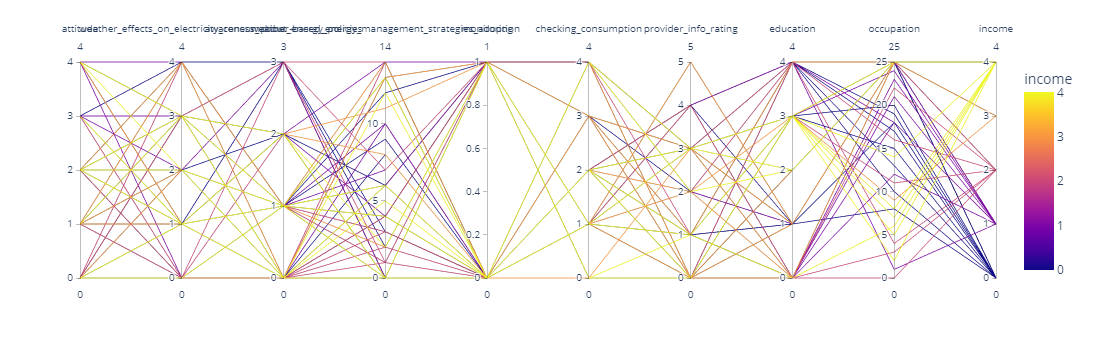

In [77]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="income")
fig.show()

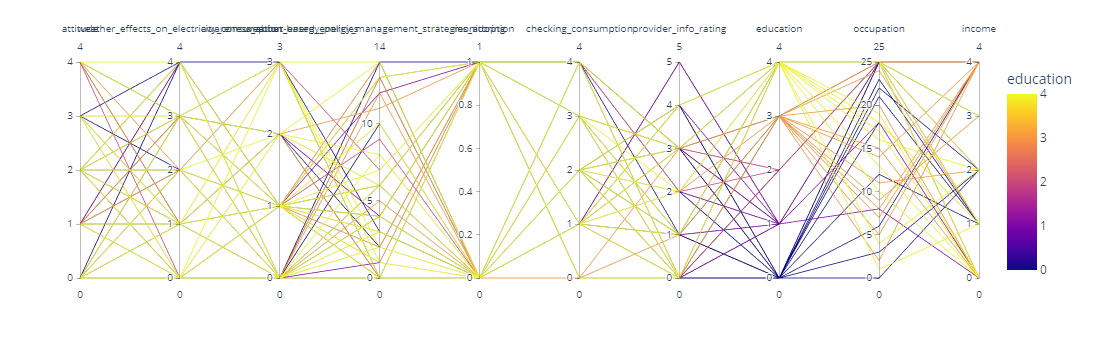

In [78]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="education")
fig.show()

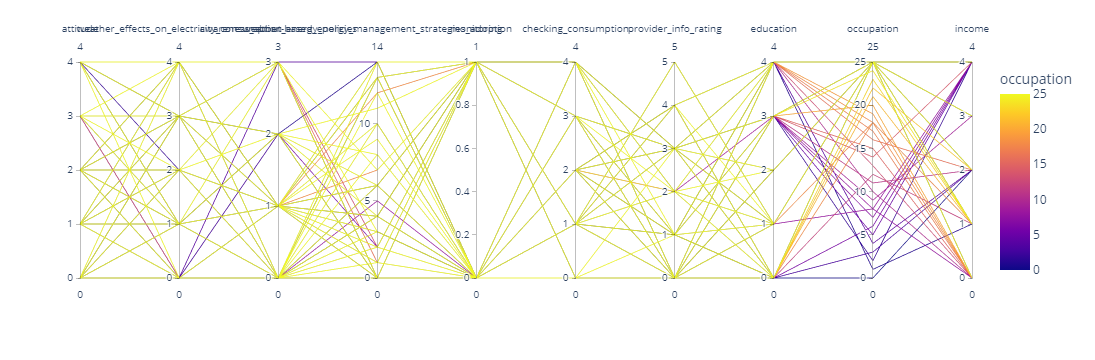

In [79]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="occupation")
fig.show()

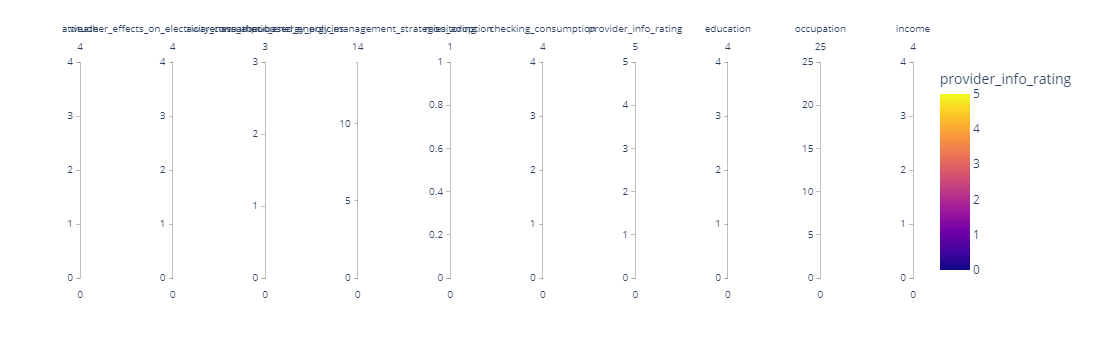

In [80]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="provider_info_rating")
fig.show()

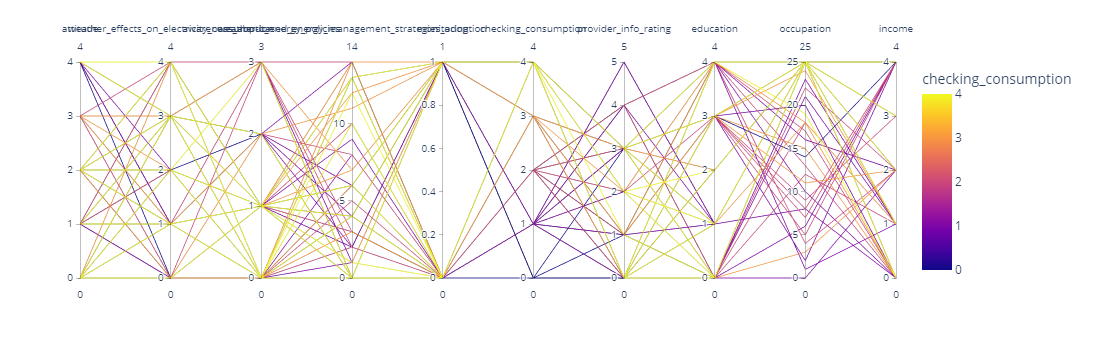

In [81]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="checking_consumption")
fig.show()

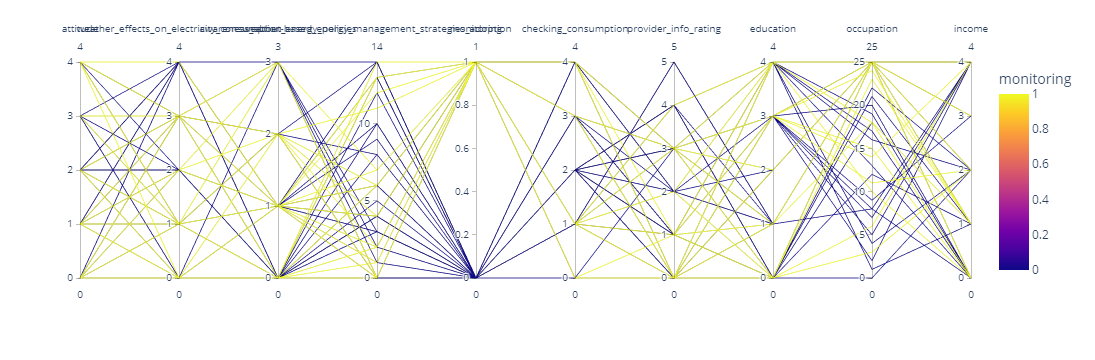

In [82]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="monitoring")
fig.show()

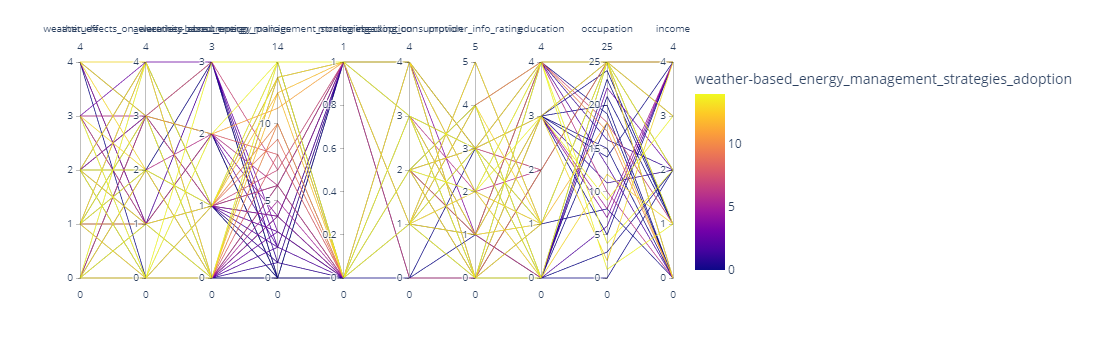

In [83]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="weather-based_energy_management_strategies_adoption")
fig.show()

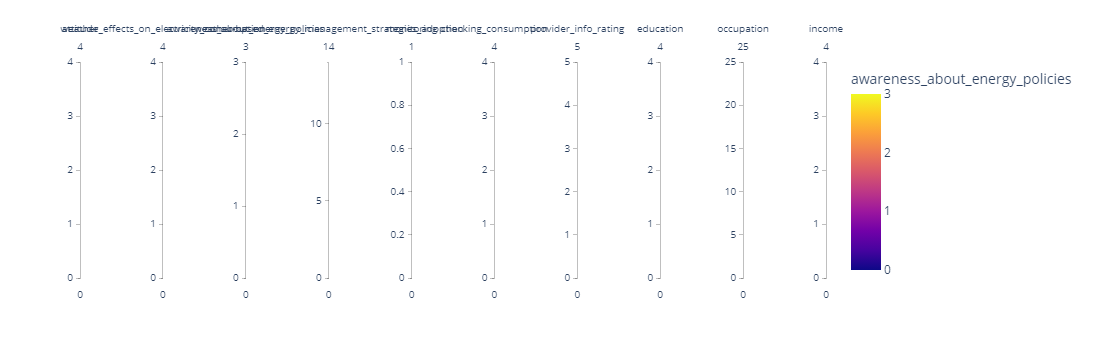

In [84]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="awareness_about_energy_policies")
fig.show()

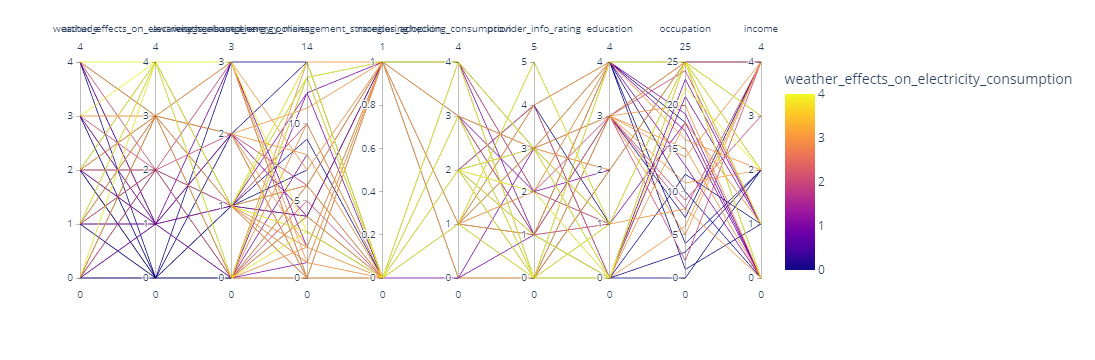

In [85]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="weather_effects_on_electricity_consumption")
fig.show()

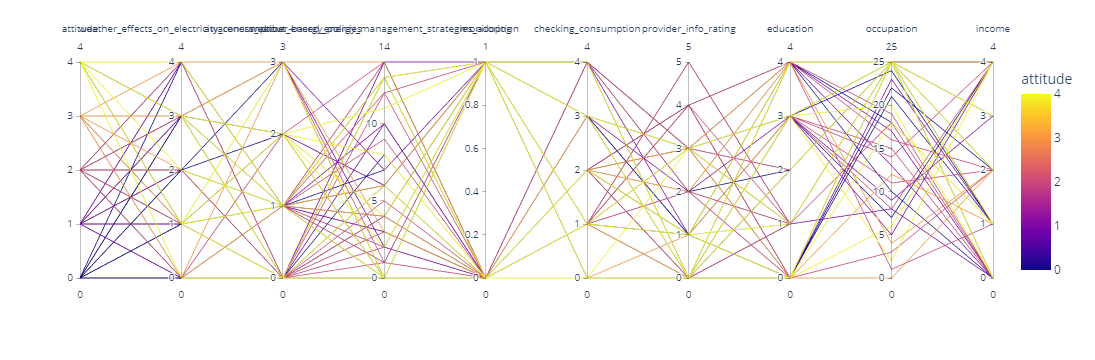

In [86]:
import plotly.express as px

fig = px.parallel_coordinates(data[features_to_encode], color="attitude")
fig.show()